In [18]:
import scipy as spy
import numpy as np
import sklearn as skl


In [19]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing as pre

In [20]:
dataset = pd.read_csv("C:/Users/baronli/Documents/Personal/Education/GC/Data Visualization 2017/HW/Project/eeg-brain-wave-for-confusion/EEG data.csv")

In [21]:
#drop unwanted columns from set
col = dataset.columns.tolist()
dataset.drop(labels=col[13:16], axis=1)

,Subject ID,Video ID,Attention (Proprietary measure of mental focus),Mediation (Proprietary measure of calmness),Raw (Raw EEG signal),Delta (1-3 Hz of power spectrum),Theta (4-7 Hz of power spectrum),Alpha 1 (Lower 8-11 Hz of power spectrum),Alpha 2 (Higher 8-11 Hz of power spectrum),Beta 1 (Lower 12-29 Hz of power spectrum),Beta 2 (Higher 12-29 Hz of power spectrum),Gamma 1 (Lower 30-100 Hz of power spectrum),Gamma 2 (Higher 30-100 Hz of power spectrum),user-defined label (whether the subject is actually confused)
0,0,0,56,43,278,301963,90612,33735,23991,27946,45097,33228,8293,0
1,0,0,40,35,-50,73787,28083,1439,2240,2746,3687,5293,2740,0
2,0,0,47,48,101,758353,383745,201999,62107,36293,130536,57243,25354,0
3,0,0,47,57,-5,2012240,129350,61236,17084,11488,62462,49960,33932,0
4,0,0,44,53,-8,1005145,354328,37102,88881,45307,99603,44790,29749,0
5,0,0,44,66,73,1786446,176766,59352,26157,15054,33669,33782,31750,0
6,0,0,43,69,130,635191,122446,90107,65072,36230,53019,62938,59307,0
7,0,0,40,61,-2,161098,12119,1963,809,1277,3186,3266,2518,0
8,0,0,43,69,17,492796,120998,63697,68242,10769,88403,73756,22676,0
9,0,0,47,69,-59,82048,116131,47317,26197,41642,28866,32551,41810,0


In [22]:
#Normalize the dataset to 0 - 1 range
data = dataset.copy()
dbnData = data.iloc[:,2:13]
min_max_scaler = pre.MinMaxScaler()
EEGrange_scaled = min_max_scaler.fit_transform(dbnData)
data.iloc[:,2:13] = EEGrange_scaled

In [23]:
# grouping by data
data_groupbySV = data.groupby(['Video ID','Subject ID'])
#data_groupbyV = data.groupby('Video ID')

In [24]:
#feature extraction - grouped by student
medianSV = data_groupbySV.mean()
maxSV = data_groupbySV.max()


In [25]:
array = np.array(medianSV.values.tolist())
X = array[:,0:11] 
Y = array[:,11]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [26]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [27]:
# Spot Check Algorithms
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=8, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LDA: 0.425000 (0.147902)
CART: 0.462500 (0.149478)
NB: 0.562500 (0.140868)
SVM: 0.512500 (0.126861)


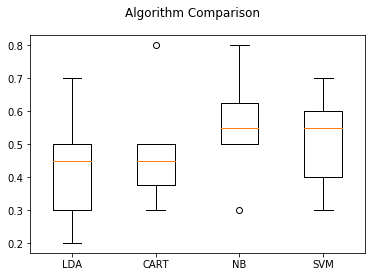

In [28]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [15]:
array = np.array(maxSV.values.tolist())
X = array[:,0:11] 
Y = array[:,11]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [16]:
# Spot Check Algorithms
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=8, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LDA: 0.537500 (0.121835)
CART: 0.550000 (0.287228)
NB: 0.562500 (0.140868)
SVM: 0.512500 (0.136359)


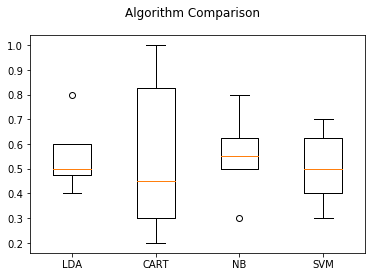

In [17]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()